<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '../../../DSI-SF-2/datasets/state_sat_scores/sat_scores.csv'

In [3]:
# example of dataframes at 3.3 slides directory 
rows = []

with open(sat_filepath, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

In [4]:
header = rows[0]
data = rows[1:]

sat_data = {}

for index, column_name in enumerate(header):
    sat_data[column_name] = []
    for row in data:
        sat_data[column_name].append(row[index])
        
sat_data

{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# creating DataFrame with sat dictionary
df = pd.DataFrame(sat_data)


In [6]:
#Loading from file executing .read_csv() function

df_2 = pd.read_csv(sat_filepath)
df_2.head(20)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
# How to use dtypes to compare

df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [8]:
df_2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
# Inputting a Dictionary outputs object data types for all columns
# Using pandas DataFrame and loading from a file outputs int64 data types for column 'Rate', 'Verbal' and 'Math'.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
newsat_stat = pd.read_csv('../../../DSI-SF-2/datasets/state_sat_scores/sat_scores.csv')
newsat_stat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [11]:
sat_dictionary = {'Name':['State', 'Rate', 'Verbal', 'Math'], 'Type':['Object', 'Integer', 'Integer', 'Integer'], 
                 'Description':['Location', 'Rate of SAT', 'Score of Verbal Section', 'Score of Math Section'], 
                 'Shape':["52 rows", "4 columns","" ,"",]}

pd.DataFrame(sat_dictionary)

,Description,Name,Shape,Type
0,Location,State,52 rows,Object
1,Rate of SAT,Rate,4 columns,Integer
2,Score of Verbal Section,Verbal,,Integer
3,Score of Math Section,Math,,Integer


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

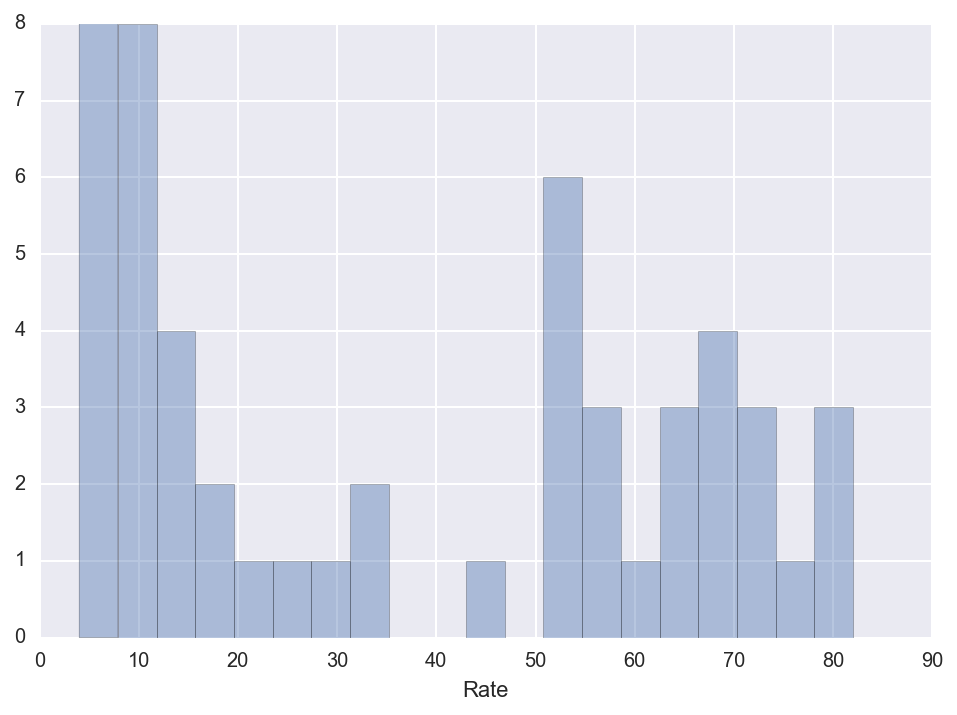

In [12]:
import seaborn as sns
sns.distplot(newsat_stat['Rate'], bins=20, kde=False)

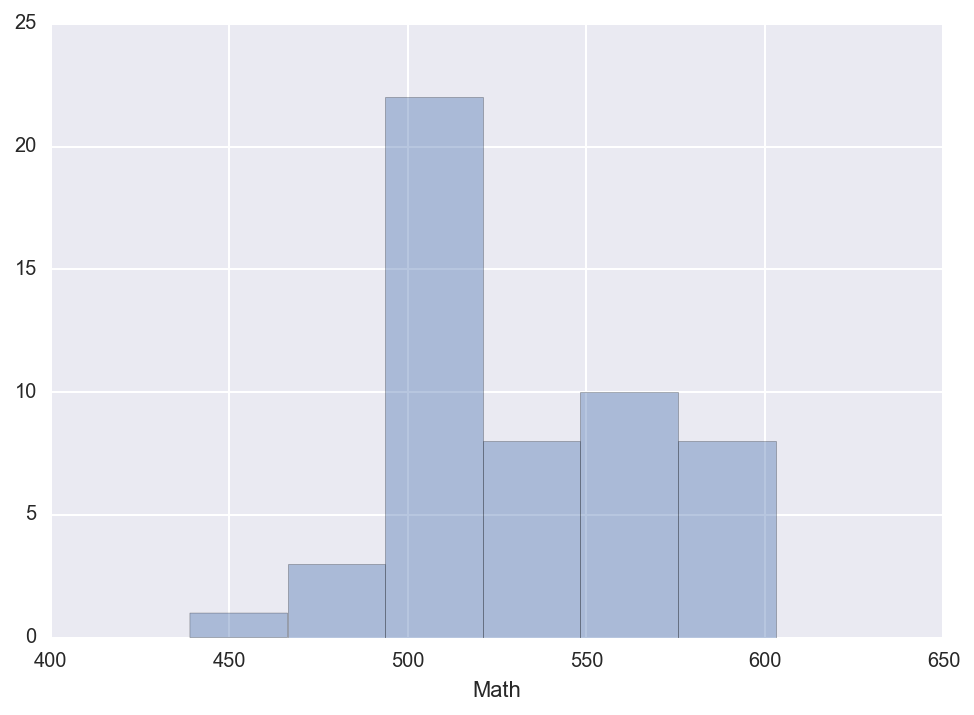

In [13]:
sns.distplot(newsat_stat['Math'], kde=False)

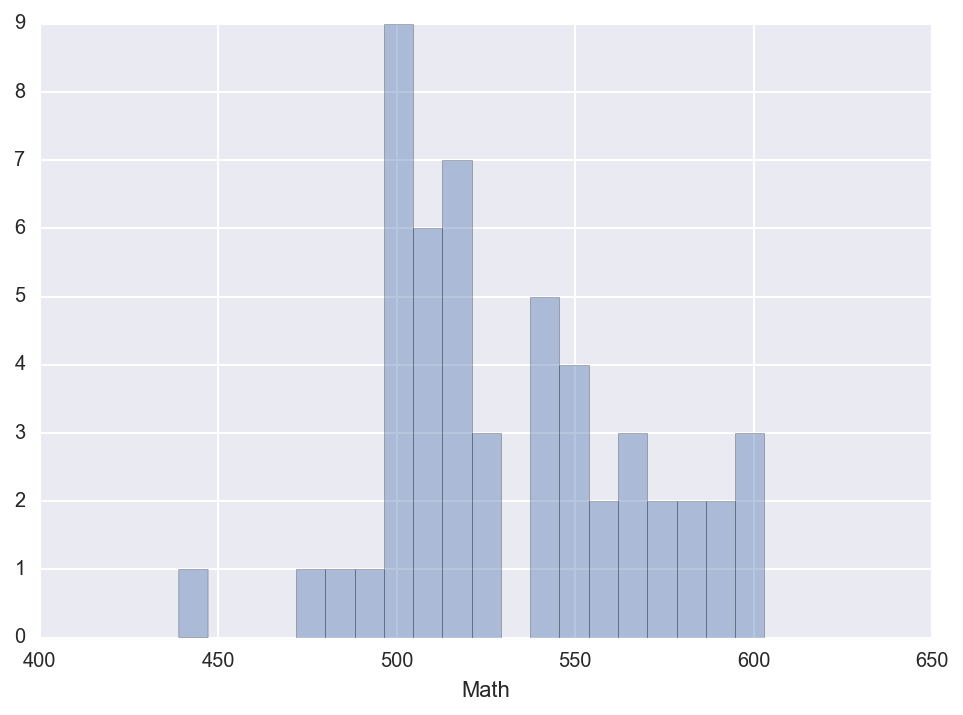

In [14]:
sns.distplot(newsat_stat['Math'],bins=20, kde=False)

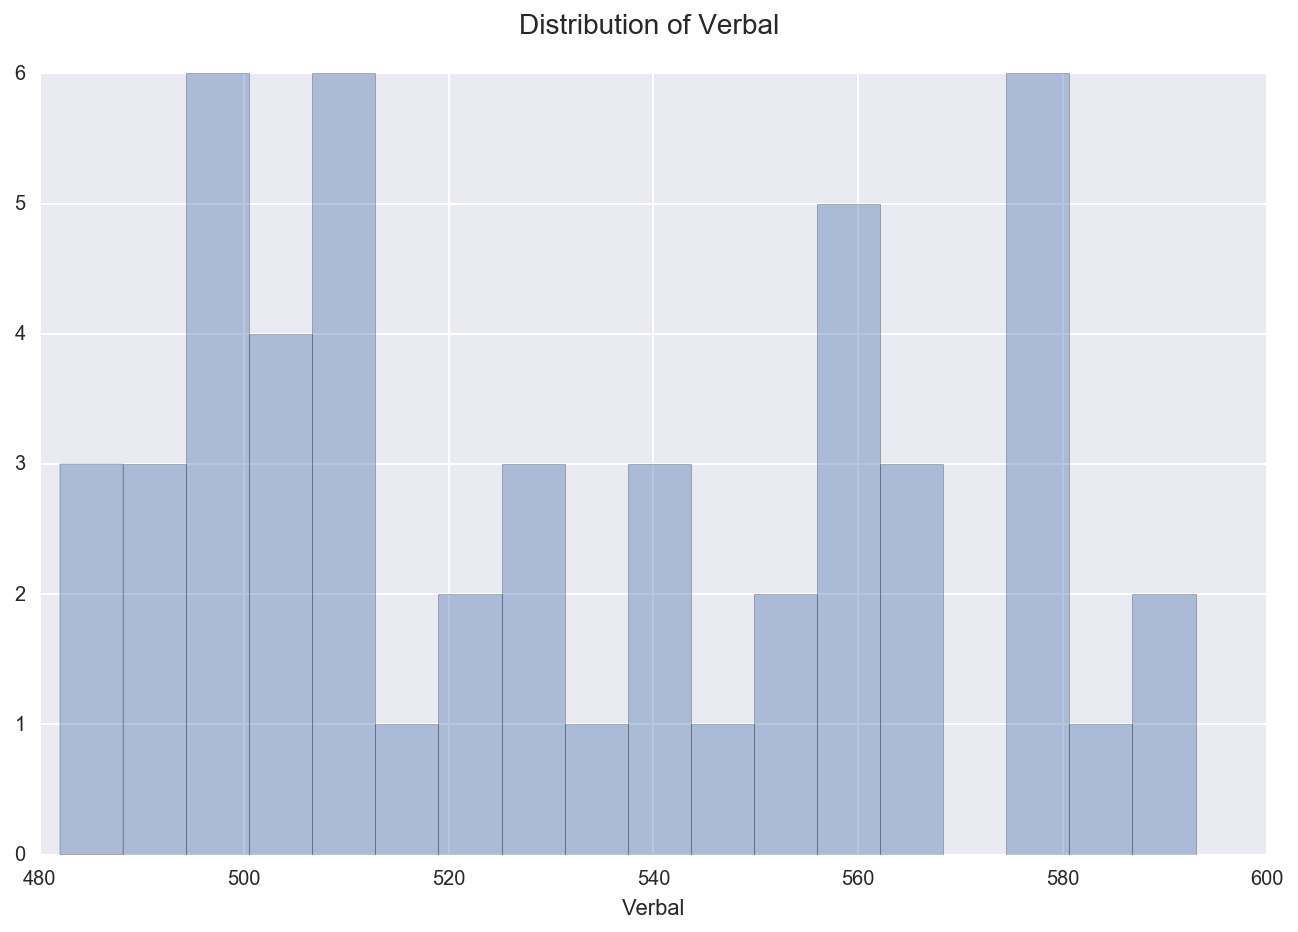

In [15]:
# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(11,7))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot the males:
ax = sns.distplot(newsat_stat['Verbal'], bins=18, kde=False)
ax.set_title("Distribution of Verbal \n", fontsize=14)



#sns.set_style("darkgrid", {"axes.facecolor": ".95"})


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

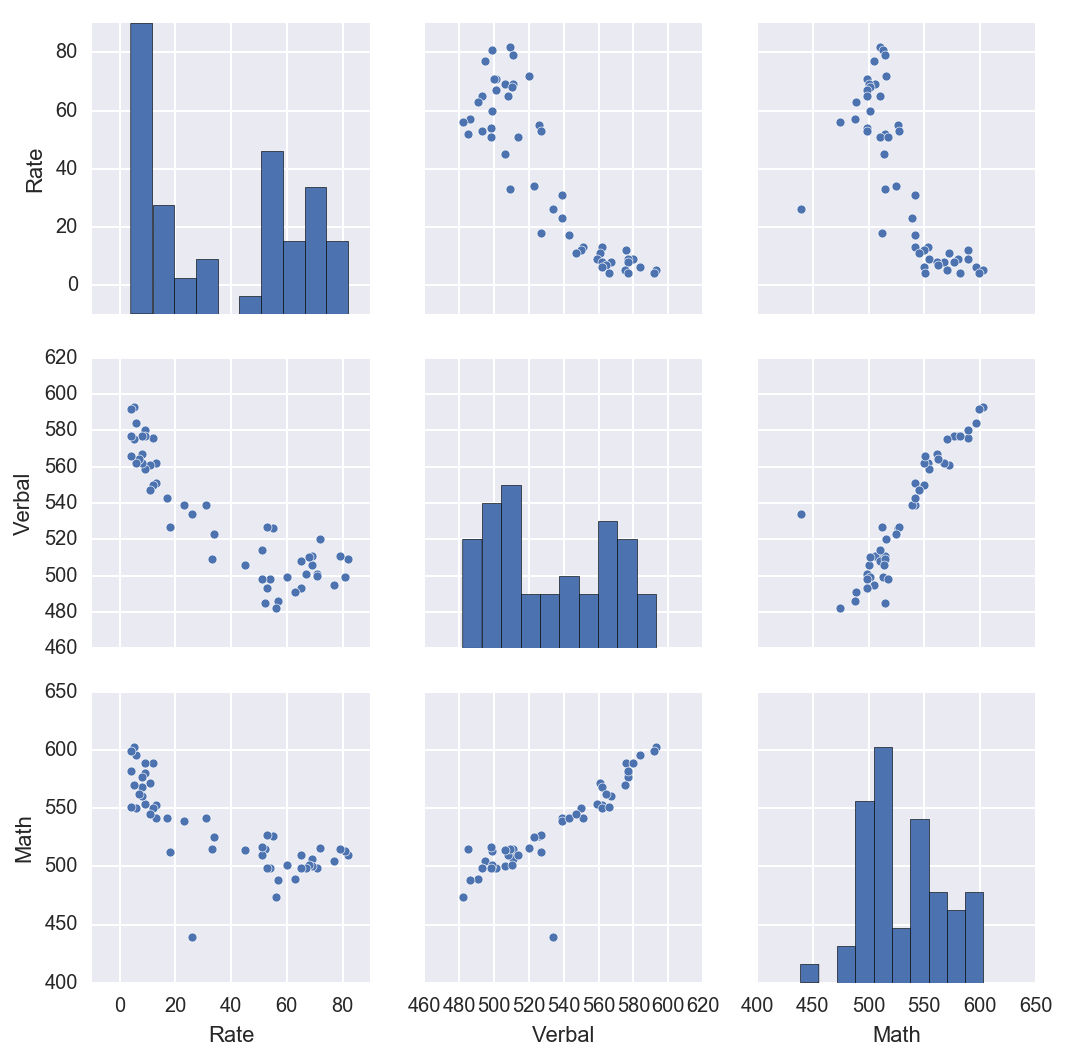

In [16]:
sns.pairplot(newsat_stat)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [17]:
verbal_math = newsat_stat[['Verbal', 'Math']]

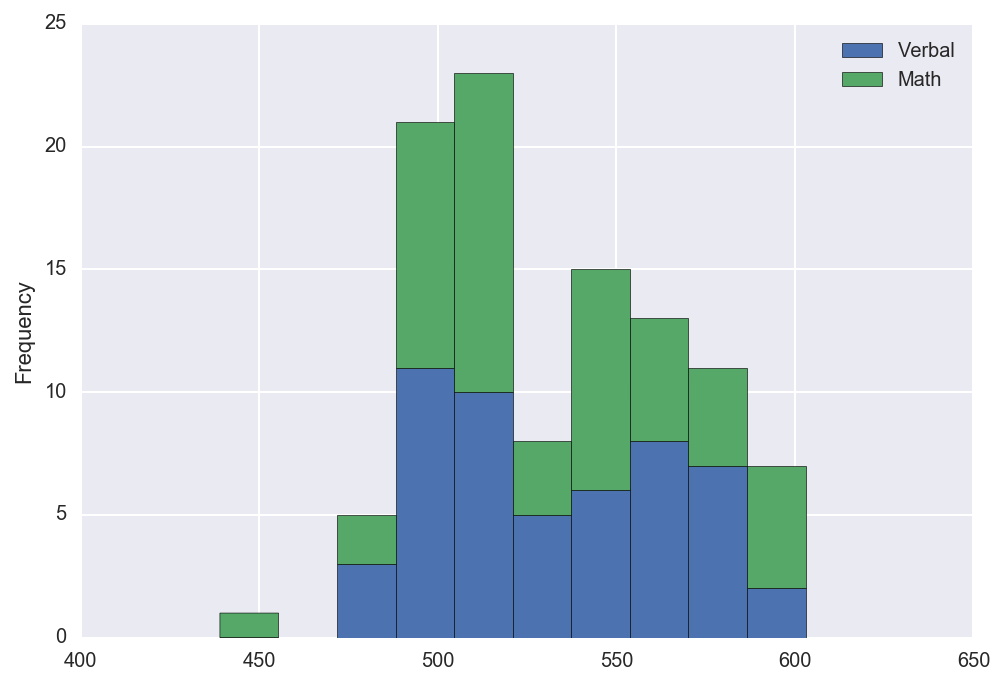

In [18]:
verbal_math.plot.hist(stacked=True)


In [19]:
sns.boxplot?

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

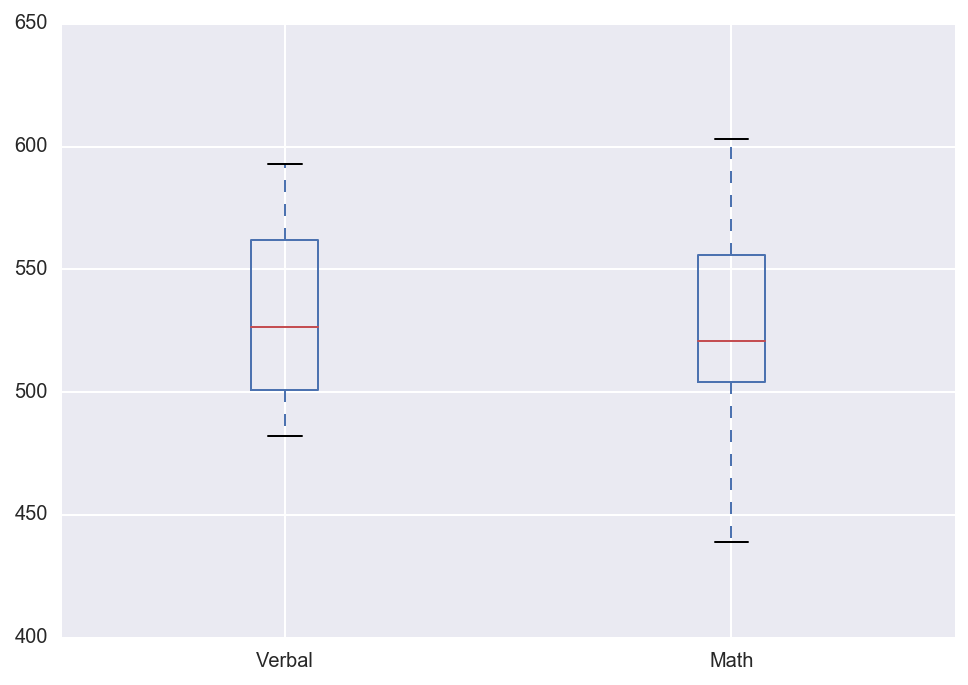

In [20]:
verbal_math.plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


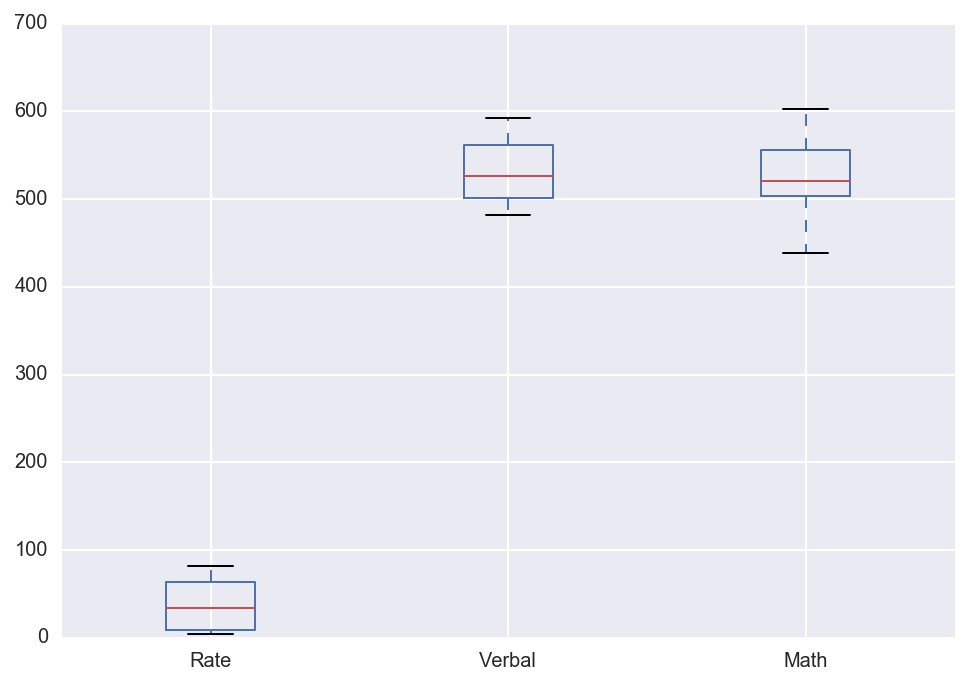

In [21]:
newsat_stat.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
mean_verbal = np.mean(newsat_stat['Verbal'])
masked_states = newsat_stat['Verbal'] > mean_verbal
states_above_mean = newsat_stat['State'][masked_states]
print "There are %d states that produce Verbal scores higher than the national mean" % len(states_above_mean)

# Shows that verbal scores are evenly distributed since almost half the states produce verbal scores are higher than the mean.

There are 24 states that produce Verbal scores higher than the national mean


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
median_verbal = np.median(newsat_stat['Verbal'])
masked = newsat_stat['Verbal'] > median_verbal
states_above_median = newsat_stat['State'][masked]
print "There are %d states that produce Verbal scores higher than the median" % len(states_above_median)

# This shows that the mean and median are close to each other
# if this is the case, you should have a normal distribution.

There are 26 states that produce Verbal scores higher than the median


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
newsat_stat['Verbal - Math'] = newsat_stat['Verbal'] - newsat_stat['Math']
newsat_stat

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
#score_diff = sorted(abs(newsat_stat['Verbal - Math']), reverse=True)
#pd_score_diff = pd.DataFrame(newsat_stat[['State', 'Verbal - Math']])
#pd_score_diff['State']
#pd_score_diff
#pd_score_diff['State'][score_diff]
#df.sort_values(['a', 'b'], ascending=[True, False])

stat = newsat_stat[['State', 'Verbal - Math']]
stat.sort_values(['Verbal - Math'], ascending=False).head(3)

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15


In [26]:
stat = newsat_stat[['State', 'Verbal - Math']]
stat.sort_values(['Verbal - Math'], ascending=True).head(3)

,State,Verbal - Math
21,HI,-30
23,CA,-19
1,NJ,-14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


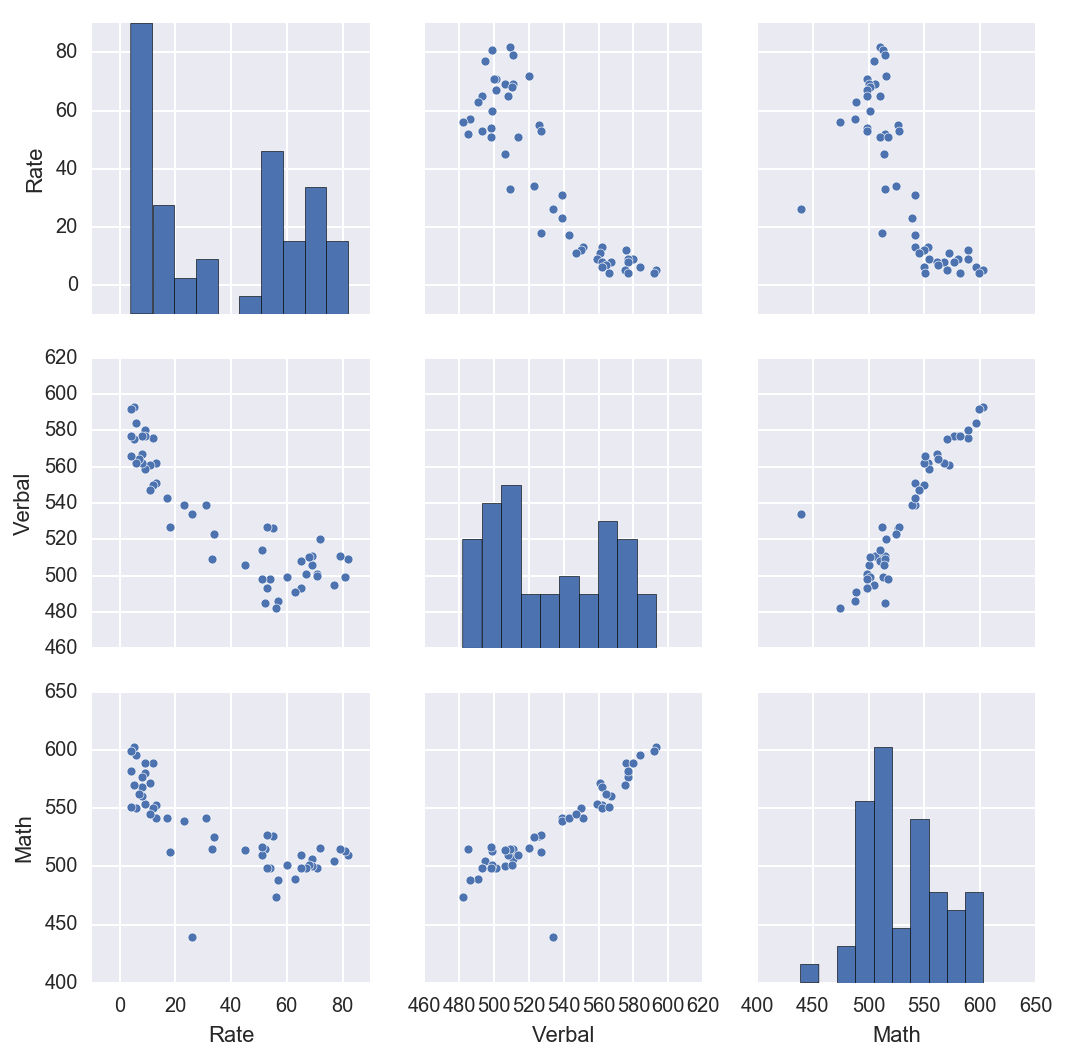

In [27]:
sns.pairplot(newsat_stat[['Rate', 'Verbal', 'Math']])

# Observation 1: The correlation from Rate to both Verbal and Math is negatively correlated. 
                # The higher the verbal/math score the less the Rate value.
    
# Observation 2: The correlation from Verbal to Math shows a positive correlation. 




### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
newsat_stat.describe()
# Row1: The count of elements or row values in each column
# Row2: The mean value of elements in each column
# Row3: The standard deviation of elements in each column
# Row4: Min value 
# Row5: The bottom quartile 
# Row6: Median Value
# Row7: The upper quartile
# Row8: Max value

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
#med_val = boston.home_median_value.values

#print np.cov(newsat_stat, ['Rate', 'Verbal', 'Math'], bias=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [30]:
drug_data_filepath = '../../../DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
drug_df = pd.read_csv(drug_data_filepath)
drug_df.info()

    
# Below info shows we have object data types for columns that should be a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [35]:
# Cleanning values '-' in object type Columns listed in object_columns

def clean(x):
    try:
        return float(x)
    except:
        return 0

object_columns = ['cocaine-frequency','crack-frequency','heroin-frequency', 'inhalant-frequency','oxycontin-frequency', 'meth-frequency']   

for col in object_columns:
    drug_df[col] = drug_df[col].map(clean)
drug_df.head()

drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [36]:
print drug_df.shape
drug_df.head(10).T
# 'n' total count within age group
##  notes: n assumed to be the total within age range
## frequency assumed to be times per year


(17, 28)


,0,1,2,3,4,5,6,7,8,9
age,12,13,14,15,16,17,18,19,20,21
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2
alcohol-frequency,3,6,5,6,10,13,24,36,48,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33
marijuana-frequency,4,15,24,25,30,36,52,60,60,52
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8
cocaine-frequency,5,1,5.5,4,7,5,5,5.5,8,5
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5
crack-frequency,0,3,0,9.5,1,21,10,2,5,17


In [37]:
new = drug_df.replace('-', np.nan, regex=True)
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        11 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [38]:
## note: 1. Correlation between marijuana-use and cocaine-use. Is marijuana a gateway drug to crack use? 
## Hypothesis: Marijuana-use has a direct positive relationship to cocaine-use.
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [39]:
#data.loc[ [row], [column]] --> referencing rows by index
drug_df_sub = drug_df.ix[:, ['marijuana-use','marijuana-frequency', 'cocaine-use','cocaine-frequency']]

drug_df_sub.head()

,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency
0,1.1,4.0,0.1,5.0
1,3.4,15.0,0.1,1.0
2,8.7,24.0,0.1,5.5
3,14.5,25.0,0.5,4.0
4,22.5,30.0,1.0,7.0


In [40]:
drug_df_sub.isnull().sum()

marijuana-use          0
marijuana-frequency    0
cocaine-use            0
cocaine-frequency      0
dtype: int64

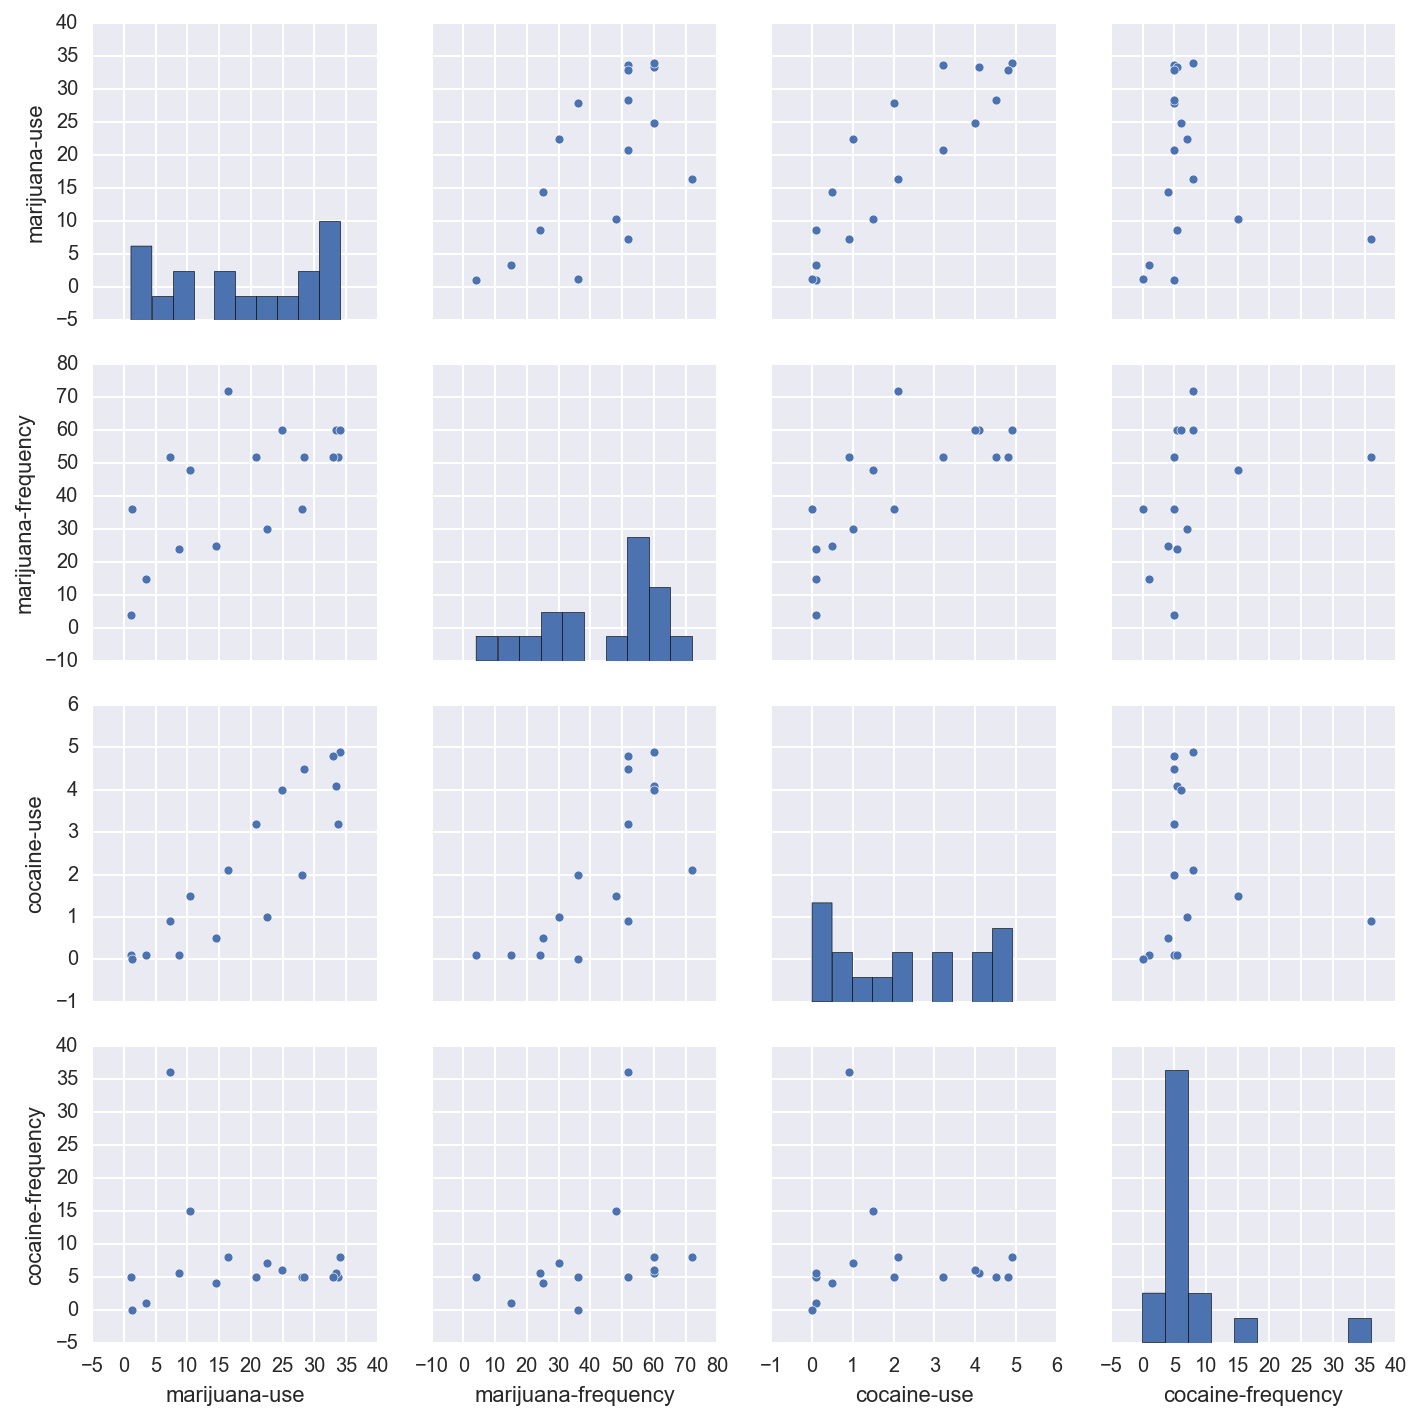

In [41]:
#look up sns.regplot() to plot relationship
sns.pairplot(drug_df_sub)

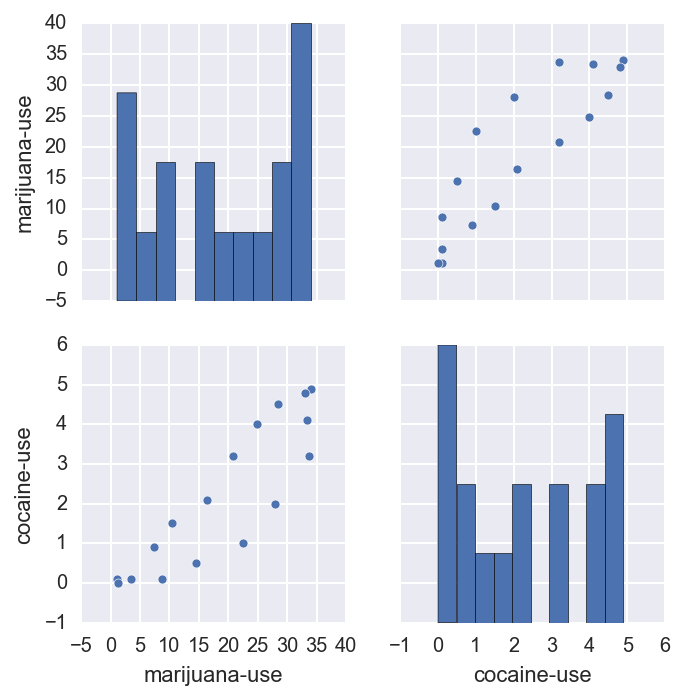

In [42]:
## conduct a pairplot that relates 'marijuana-use' and 'cocaine-use'
sns.pairplot(drug_df_sub[['marijuana-use','cocaine-use']])

# for cocaine users most likely using marijuana in the same rate as well
# marijuana use has a positive correlation 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.